Divya, Nupur, Ranadheer, Varun

**Importing libraries needed**


In [689]:
import pandas as pd
import os, csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading dataset**


In [690]:
Airfares =pd.read_csv("/content/sample_data/Airfares.csv")

**Data Overview**


In [691]:
Airfares.shape

(638, 18)

In [692]:
Airfares.dtypes

S_CODE       object
S_CITY       object
E_CODE       object
E_CITY       object
COUPON      float64
NEW           int64
VACATION     object
SW           object
HI          float64
S_INCOME    float64
E_INCOME    float64
S_POP         int64
E_POP         int64
SLOT         object
GATE         object
DISTANCE      int64
PAX           int64
FARE        float64
dtype: object

In [693]:
Airfares.head()

,S_CODE,S_CITY,E_CODE,E_CITY,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
0,*,Dallas/Fort Worth TX,*,Amarillo TX,1.00,3,No,Yes,5291.99,28637.0,21112.0,3036732,205711,Free,Free,312,7864,64.11
1,*,Atlanta GA,*,Baltimore/Wash Intl MD,1.06,3,No,No,5419.16,26993.0,29838.0,3532657,7145897,Free,Free,576,8820,174.47
2,*,Boston MA,*,Baltimore/Wash Intl MD,1.06,3,No,No,9185.28,30124.0,29838.0,5787293,7145897,Free,Free,364,6452,207.76
3,ORD,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.35,29260.0,29838.0,7830332,7145897,Controlled,Free,612,25144,85.47
4,MDW,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.35,29260.0,29838.0,7830332,7145897,Free,Free,612,25144,85.47


**Data Cleansing**


In [694]:
Airfares = Airfares[ Airfares != 0 ].dropna()

In [695]:
Airfares.shape

(604, 18)

In [696]:
Airfares.isna().sum()

S_CODE      0
S_CITY      0
E_CODE      0
E_CITY      0
COUPON      0
NEW         0
VACATION    0
SW          0
HI          0
S_INCOME    0
E_INCOME    0
S_POP       0
E_POP       0
SLOT        0
GATE        0
DISTANCE    0
PAX         0
FARE        0
dtype: int64

**Descriptive and Exploratory Data Analysis**

In [697]:
Airfares.VACATION.value_counts()

No     448
Yes    156
Name: VACATION, dtype: int64

In [698]:
Airfares.SW.value_counts()

No     424
Yes    180
Name: SW, dtype: int64

In [699]:
pd.crosstab(index=Airfares.VACATION, columns=Airfares.SW)

SW,No,Yes
VACATION,,
No,314,134
Yes,110,46


In [700]:
Airfares = Airfares.drop(['S_CODE', 'E_CODE'], axis=1)

In [701]:
Airfares

,S_CITY,E_CITY,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
0,Dallas/Fort Worth TX,Amarillo TX,1.00,3.0,No,Yes,5291.99,28637.0,21112.0,3036732,205711,Free,Free,312,7864,64.11
1,Atlanta GA,Baltimore/Wash Intl MD,1.06,3.0,No,No,5419.16,26993.0,29838.0,3532657,7145897,Free,Free,576,8820,174.47
2,Boston MA,Baltimore/Wash Intl MD,1.06,3.0,No,No,9185.28,30124.0,29838.0,5787293,7145897,Free,Free,364,6452,207.76
3,Chicago IL,Baltimore/Wash Intl MD,1.06,3.0,No,Yes,2657.35,29260.0,29838.0,7830332,7145897,Controlled,Free,612,25144,85.47
4,Chicago IL,Baltimore/Wash Intl MD,1.06,3.0,No,Yes,2657.35,29260.0,29838.0,7830332,7145897,Free,Free,612,25144,85.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,New York/Newark NY,West Palm Beach FL,1.08,3.0,Yes,No,2216.70,32991.0,37375.0,8621121,991717,Controlled,Free,1030,34324,129.63
633,New York/Newark NY,West Palm Beach FL,1.08,3.0,Yes,No,2216.70,32991.0,37375.0,8621121,991717,Controlled,Free,1030,34324,129.63
635,Philadelphia/Camden PA,West Palm Beach FL,1.17,3.0,Yes,No,6797.80,27994.0,37375.0,4948339,991717,Free,Free,960,6016,124.87
636,Washington DC,West Palm Beach FL,1.28,3.0,Yes,No,5566.43,31981.0,37375.0,4549784,991717,Free,Free,858,4877,129.62


**Splitting Starting and Ending city.**

In [702]:
new1 = Airfares["S_CITY"].str.split("   ", n = 1, expand = True)
new2 = Airfares["S_CITY"].str.split("   ", n = 1, expand = True)

In [703]:
new1.head()

,0,1
0,Dallas/Fort Worth,TX
1,Atlanta,GA
2,Boston,MA
3,Chicago,IL
4,Chicago,IL


In [704]:
new1

,0,1
0,Dallas/Fort Worth,TX
1,Atlanta,GA
2,Boston,MA
3,Chicago,IL
4,Chicago,IL
...,...,...
632,New York/Newark,NY
633,New York/Newark,NY
635,Philadelphia/Camden PA,None
636,Washington,DC


In [705]:
new2

,0,1
0,Dallas/Fort Worth,TX
1,Atlanta,GA
2,Boston,MA
3,Chicago,IL
4,Chicago,IL
...,...,...
632,New York/Newark,NY
633,New York/Newark,NY
635,Philadelphia/Camden PA,None
636,Washington,DC


In [706]:
Airfares["S_CITY"]= new1[0]
Airfares["E_CITY"]= new2[0]

In [707]:
Airfares["S_STATE"]= new1[1]
Airfares["E_STATE"]= new2[1]

In [708]:
missing_data = new1.isnull().sum(axis=0).reset_index()
missing_data.columns = ['variable', 'missing values']
missing_data['filling factor (%)']=(new1.shape[0]-missing_data['missing values'])/new1.shape[0]*100
missing_data.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,1,22,96.357616
1,0,0,100.000000


In [709]:
missing_data = new2.isnull().sum(axis=0).reset_index()
missing_data.columns = ['variable', 'missing values']
missing_data['filling factor (%)']=(new2.shape[0]-missing_data['missing values'])/new2.shape[0]*100
missing_data.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,1,22,96.357616
1,0,0,100.000000


In [710]:
Airfares['S_STATE'].str.replace(' ', '')
Airfares['E_STATE'].str.replace(' ', '')

0        TX
1        GA
2        MA
3        IL
4        IL
       ... 
632      NY
633      NY
635    None
636      DC
637      DC
Name: E_STATE, Length: 604, dtype: object

In [711]:
Airfares

,S_CITY,E_CITY,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE,S_STATE,E_STATE
0,Dallas/Fort Worth,Dallas/Fort Worth,1.00,3.0,No,Yes,5291.99,28637.0,21112.0,3036732,205711,Free,Free,312,7864,64.11,TX,TX
1,Atlanta,Atlanta,1.06,3.0,No,No,5419.16,26993.0,29838.0,3532657,7145897,Free,Free,576,8820,174.47,GA,GA
2,Boston,Boston,1.06,3.0,No,No,9185.28,30124.0,29838.0,5787293,7145897,Free,Free,364,6452,207.76,MA,MA
3,Chicago,Chicago,1.06,3.0,No,Yes,2657.35,29260.0,29838.0,7830332,7145897,Controlled,Free,612,25144,85.47,IL,IL
4,Chicago,Chicago,1.06,3.0,No,Yes,2657.35,29260.0,29838.0,7830332,7145897,Free,Free,612,25144,85.47,IL,IL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,New York/Newark,New York/Newark,1.08,3.0,Yes,No,2216.70,32991.0,37375.0,8621121,991717,Controlled,Free,1030,34324,129.63,NY,NY
633,New York/Newark,New York/Newark,1.08,3.0,Yes,No,2216.70,32991.0,37375.0,8621121,991717,Controlled,Free,1030,34324,129.63,NY,NY
635,Philadelphia/Camden PA,Philadelphia/Camden PA,1.17,3.0,Yes,No,6797.80,27994.0,37375.0,4948339,991717,Free,Free,960,6016,124.87,None,None
636,Washington,Washington,1.28,3.0,Yes,No,5566.43,31981.0,37375.0,4549784,991717,Free,Free,858,4877,129.62,DC,DC


In [712]:
Airfare = Airfares.S_STATE.unique()

In [713]:
Airfare = Airfare.astype(str)

In [714]:
Airfare

array(['TX', '          GA', '           MA', '          IL',
       '        OH', '  FL', '          TX', '      MO', '        NV',
       '      CA', '        TN', '      LA', '  NY', '          FL',
       '          AZ', '   UT', '        CA', '    CA', '         MO',
       '            FL', '   WA', '           TX', '       OH',
       '       DC', '      NM', '   TX', '           CO', '          MI',
       '      FL', '          CA', '         OH', 'None', '     FL',
       '          TN', '         CT', '            NE', '            ID',
       '  HI', '       CA', '         CA', '          WA', '         OR',
       '        AK', '       PA'], dtype='<U14')

In [715]:
np.char.strip(Airfare)

array(['TX', 'GA', 'MA', 'IL', 'OH', 'FL', 'TX', 'MO', 'NV', 'CA', 'TN',
       'LA', 'NY', 'FL', 'AZ', 'UT', 'CA', 'CA', 'MO', 'FL', 'WA', 'TX',
       'OH', 'DC', 'NM', 'TX', 'CO', 'MI', 'FL', 'CA', 'OH', 'None', 'FL',
       'TN', 'CT', 'NE', 'ID', 'HI', 'CA', 'CA', 'WA', 'OR', 'AK', 'PA'],
      dtype='<U14')

In [716]:
Air = np.char.strip(Airfare)

In [717]:
Airfare = np.unique(Air)

In [718]:
Airfare = Airfare.tolist()

In [719]:
pd.crosstab(index=Airfares.S_CITY, columns=Airfare)

col_0,AK
col_1,AZ
col_2,CA
col_3,CO
col_4,CT
col_5,DC
col_6,FL
col_7,GA
col_8,HI
col_9,ID
col_10,IL


In [720]:
Airfares

,S_CITY,E_CITY,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE,S_STATE,E_STATE
0,Dallas/Fort Worth,Dallas/Fort Worth,1.00,3.0,No,Yes,5291.99,28637.0,21112.0,3036732,205711,Free,Free,312,7864,64.11,TX,TX
1,Atlanta,Atlanta,1.06,3.0,No,No,5419.16,26993.0,29838.0,3532657,7145897,Free,Free,576,8820,174.47,GA,GA
2,Boston,Boston,1.06,3.0,No,No,9185.28,30124.0,29838.0,5787293,7145897,Free,Free,364,6452,207.76,MA,MA
3,Chicago,Chicago,1.06,3.0,No,Yes,2657.35,29260.0,29838.0,7830332,7145897,Controlled,Free,612,25144,85.47,IL,IL
4,Chicago,Chicago,1.06,3.0,No,Yes,2657.35,29260.0,29838.0,7830332,7145897,Free,Free,612,25144,85.47,IL,IL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,New York/Newark,New York/Newark,1.08,3.0,Yes,No,2216.70,32991.0,37375.0,8621121,991717,Controlled,Free,1030,34324,129.63,NY,NY
633,New York/Newark,New York/Newark,1.08,3.0,Yes,No,2216.70,32991.0,37375.0,8621121,991717,Controlled,Free,1030,34324,129.63,NY,NY
635,Philadelphia/Camden PA,Philadelphia/Camden PA,1.17,3.0,Yes,No,6797.80,27994.0,37375.0,4948339,991717,Free,Free,960,6016,124.87,None,None
636,Washington,Washington,1.28,3.0,Yes,No,5566.43,31981.0,37375.0,4549784,991717,Free,Free,858,4877,129.62,DC,DC


**Vistualization for Airfare Analysis.**



Text(0.5, 1.0, 'Histogram of Passengers on the route during analysis')

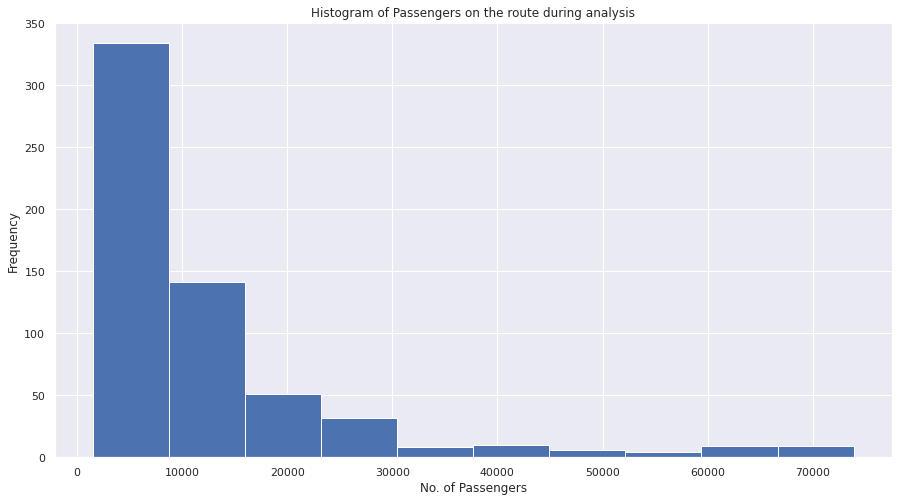

In [721]:
plt.hist(Airfares['PAX'])
plt.xlabel("No. of Passengers")
plt.ylabel("Frequency")
plt.title("Histogram of Passengers on the route during analysis")

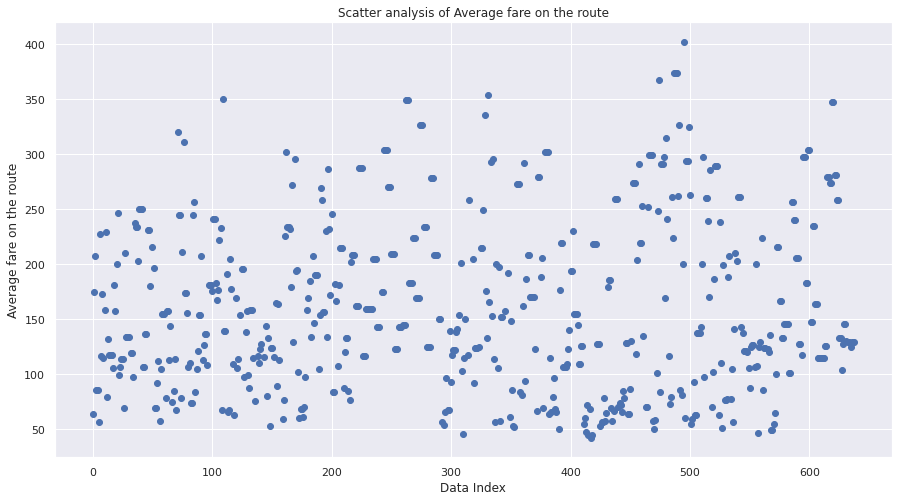

In [722]:
plt.scatter(Airfares.index,Airfares['FARE'])
plt.xlabel("Data Index")
plt.ylabel("Average fare on the route")
plt.title("Scatter analysis of Average fare on the route")
plt.show()

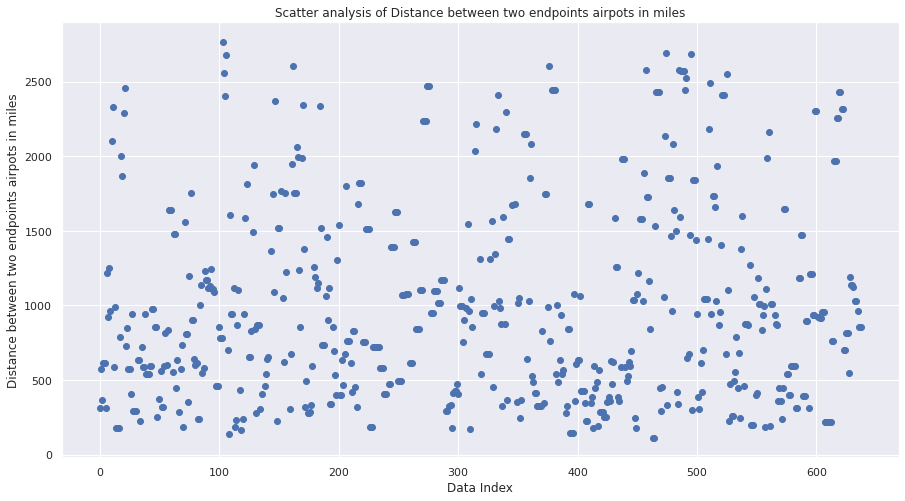

In [723]:
plt.scatter(Airfares.index,Airfares['DISTANCE'])
plt.xlabel("Data Index")
plt.ylabel("Distance between two endpoints airpots in miles")
plt.title("Scatter analysis of Distance between two endpoints airpots in miles")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


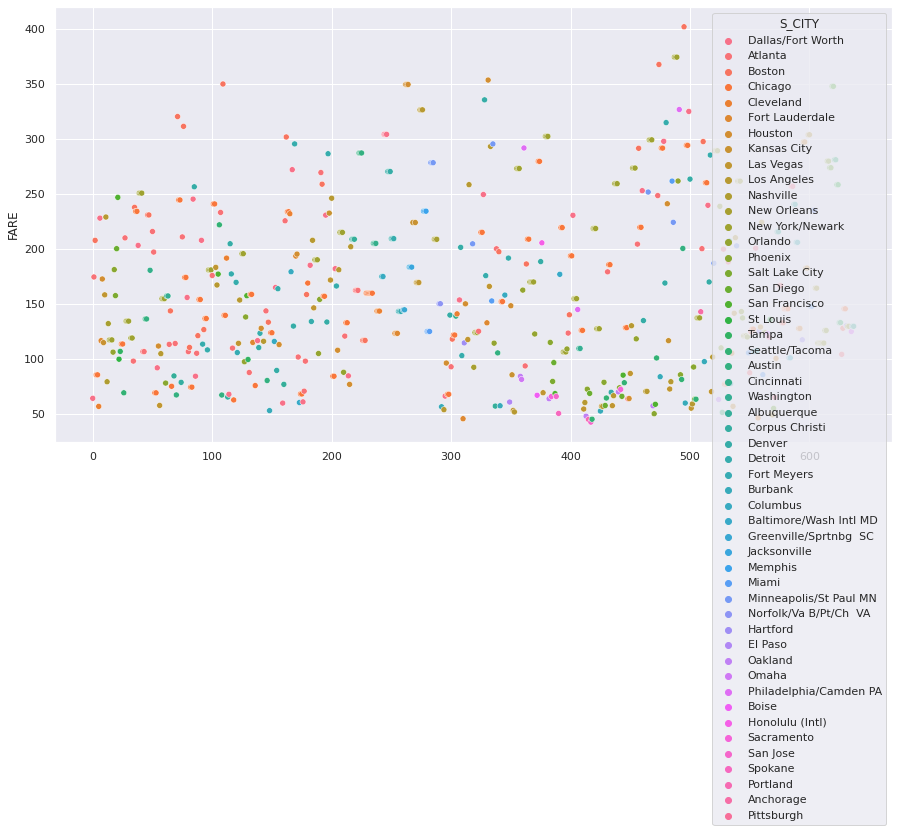

In [724]:
sns.scatterplot(Airfares.index, y= Airfares['FARE'],hue=Airfares['S_CITY'])

In [725]:
Airs = Airfares[['E_CITY','FARE']]
Airs['mean'] = Airs.groupby('E_CITY')['FARE'].transform(lambda x: x.mean())

data = Airs.drop('FARE',axis=1).drop_duplicates().sort_values(by='mean',ascending=False).head(20)
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,E_CITY,mean
283,Minneapolis/St Paul MN,242.825455
277,Memphis,234.310000
376,Honolulu (Intl),205.510000
2,Boston,203.749333
361,Philadelphia/Camden PA,202.252000
85,Denver,195.018571
14,New York/Newark,192.809762
8,Houston,190.325500
22,St Louis,188.050000
48,Cincinnati,186.888000


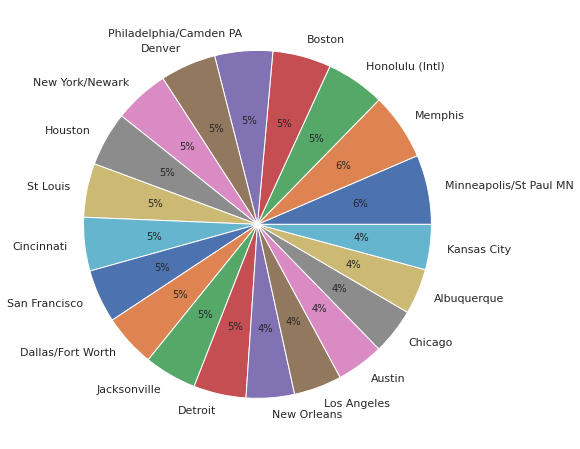

In [726]:
plt.figure(figsize=(8,8))
# Create a pieplot
plt.pie(x=data['mean'],labels=data['E_CITY'],autopct='%.0f%%');

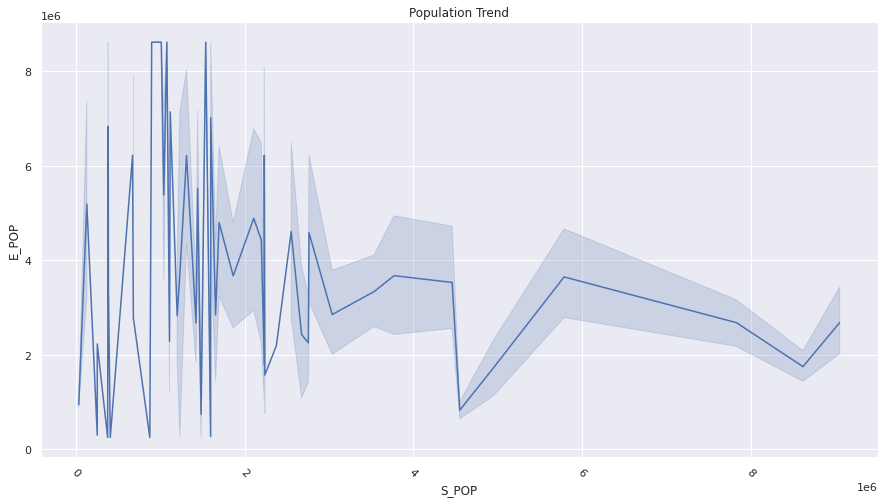

In [727]:
sns.set(rc={'figure.figsize':(15,8)})
sns.set_theme(style='darkgrid')
sns.lineplot(x='S_POP',y='E_POP',data=Airfares,markers=True).set(title="Population Trend")
plt.xticks(rotation=-45);

**Dataframe creation with statitical infos on each starting city.**

In [728]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}

global_stats = Airfares['FARE'].groupby(Airfares['S_CITY']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('count')
global_stats

,min,max,count,mean
S_CITY,,,,
Pittsburgh,119.84,119.84,1.0,119.840000
Honolulu (Intl),205.51,205.51,1.0,205.510000
Omaha,81.32,81.32,1.0,81.320000
El Paso,60.73,60.73,1.0,60.730000
Portland,44.89,44.89,1.0,44.890000
Nashville,79.17,79.17,1.0,79.170000
Anchorage,142.83,142.83,1.0,142.830000
Spokane,50.38,50.38,1.0,50.380000
Boise,66.88,66.88,1.0,66.880000


Text(0.5, 1.0, 'Statistical analysis of starting city')

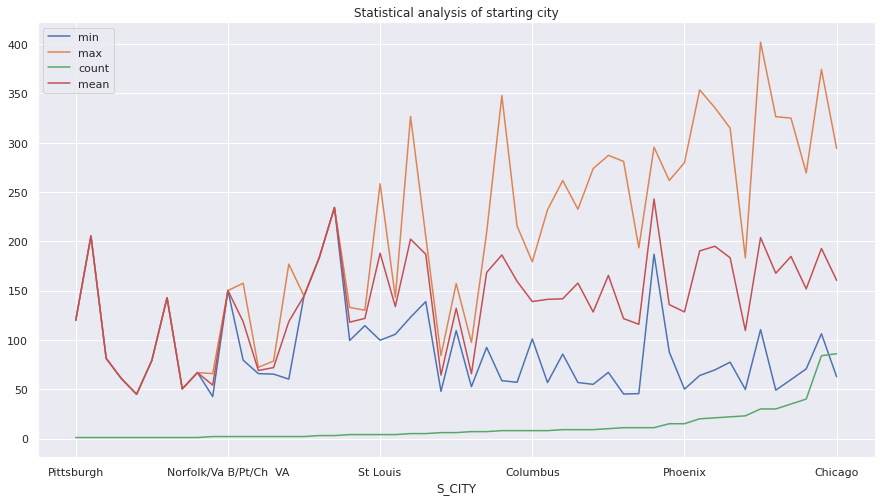

In [729]:
global_stats.plot(legend=True)
plt.title("Statistical analysis of starting city")

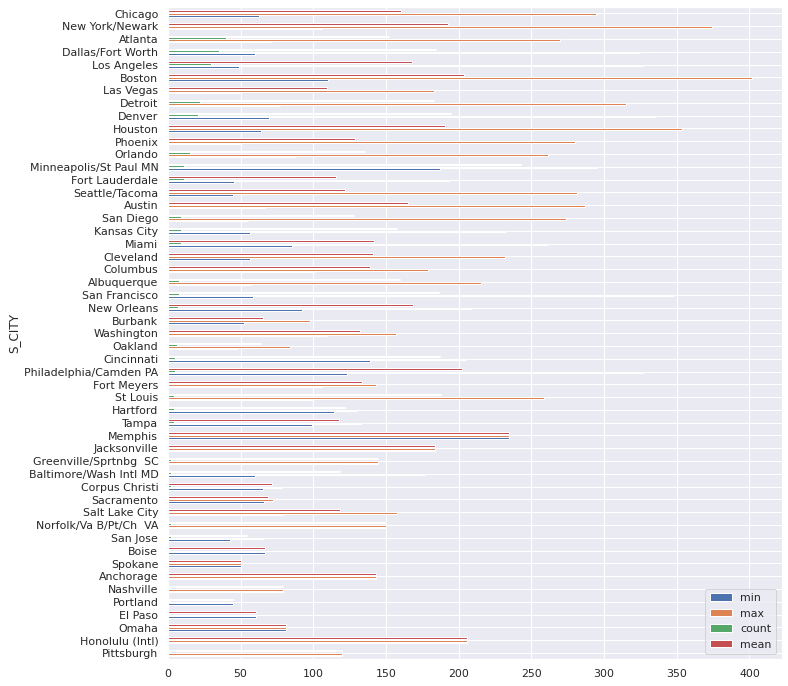

In [730]:
global_stats.plot.barh(figsize=(11,12), stacked=False)
plt.show()

**Airfare analysis at the time of Vacation in States.**

In [731]:
VacationAirfares = Airfares.loc[Airfares['VACATION'] == 'Yes']

In [732]:
VacationAirfares

,S_CITY,E_CITY,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE,S_STATE,E_STATE
7,Fort Lauderdale,Fort Lauderdale,1.15,3.0,Yes,Yes,5584.00,26752.0,29838.0,1440377,7145897,Free,Free,921,5512,116.54,FL,FL
10,Las Vegas,Las Vegas,1.57,3.0,Yes,Yes,1772.59,24575.0,29838.0,1197234,7145897,Free,Free,2104,4489,158.20,NV,NV
17,Orlando,Orlando,1.13,3.0,Yes,Yes,5706.76,22360.0,29838.0,1421287,7145897,Free,Free,788,11013,106.11,FL,FL
23,Tampa,Tampa,1.13,3.0,Yes,Yes,5201.34,23654.0,29838.0,2195215,7145897,Free,Free,846,7082,106.77,FL,FL
56,Las Vegas,Las Vegas,1.16,3.0,Yes,No,3465.14,24575.0,22263.0,1197234,472254,Free,Free,602,8810,57.62,NV,NV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,New York/Newark,New York/Newark,1.08,3.0,Yes,No,2216.70,32991.0,37375.0,8621121,991717,Controlled,Free,1030,34324,129.63,NY,NY
633,New York/Newark,New York/Newark,1.08,3.0,Yes,No,2216.70,32991.0,37375.0,8621121,991717,Controlled,Free,1030,34324,129.63,NY,NY
635,Philadelphia/Camden PA,Philadelphia/Camden PA,1.17,3.0,Yes,No,6797.80,27994.0,37375.0,4948339,991717,Free,Free,960,6016,124.87,None,None
636,Washington,Washington,1.28,3.0,Yes,No,5566.43,31981.0,37375.0,4549784,991717,Free,Free,858,4877,129.62,DC,DC


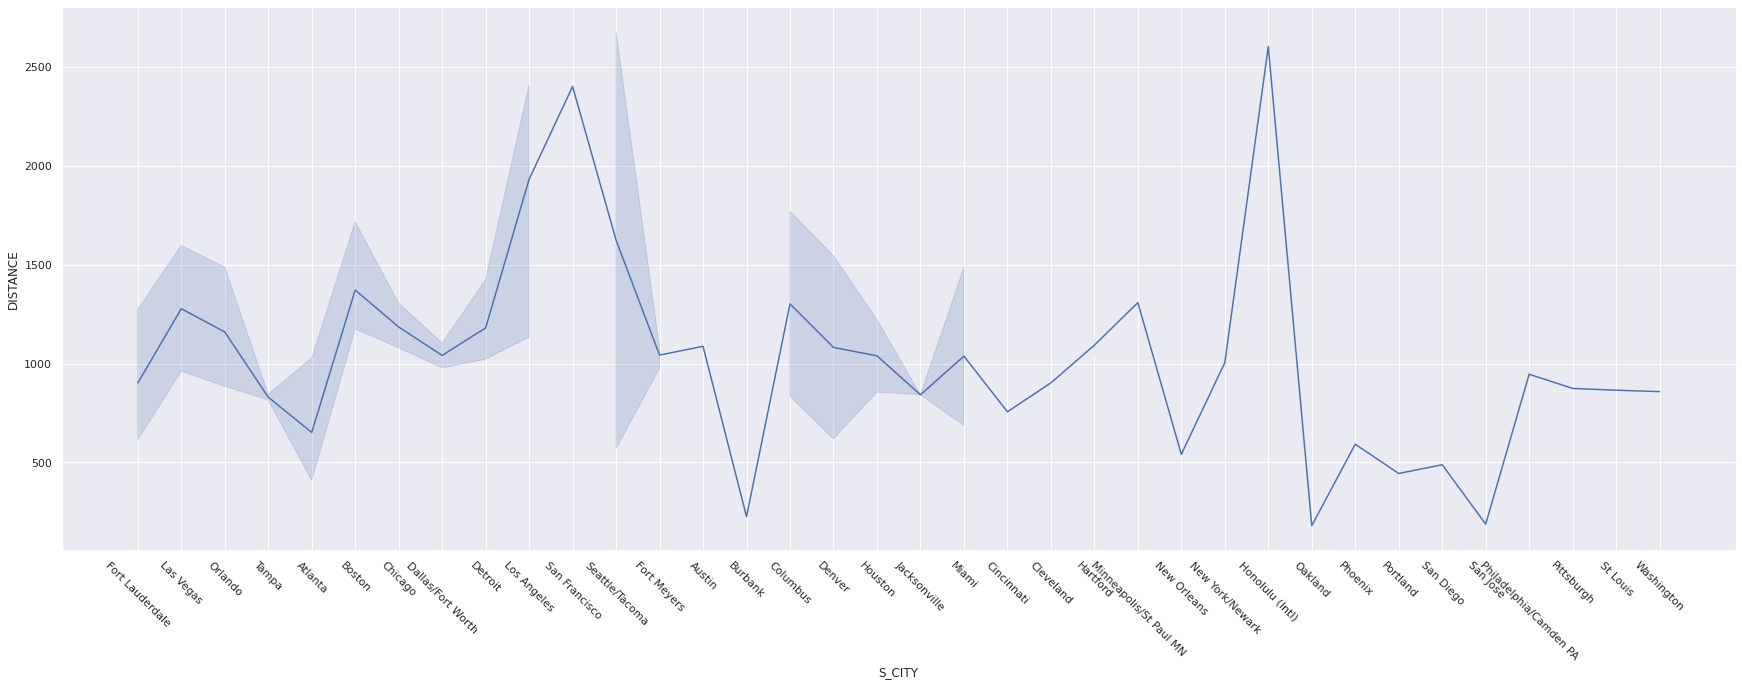

In [733]:
sns.set(rc={'figure.figsize':(30,10)})
sns.set_theme(style='darkgrid')
sns.lineplot(x='S_CITY',y='DISTANCE',data=VacationAirfares,markers=True)
plt.xticks(rotation=-45);

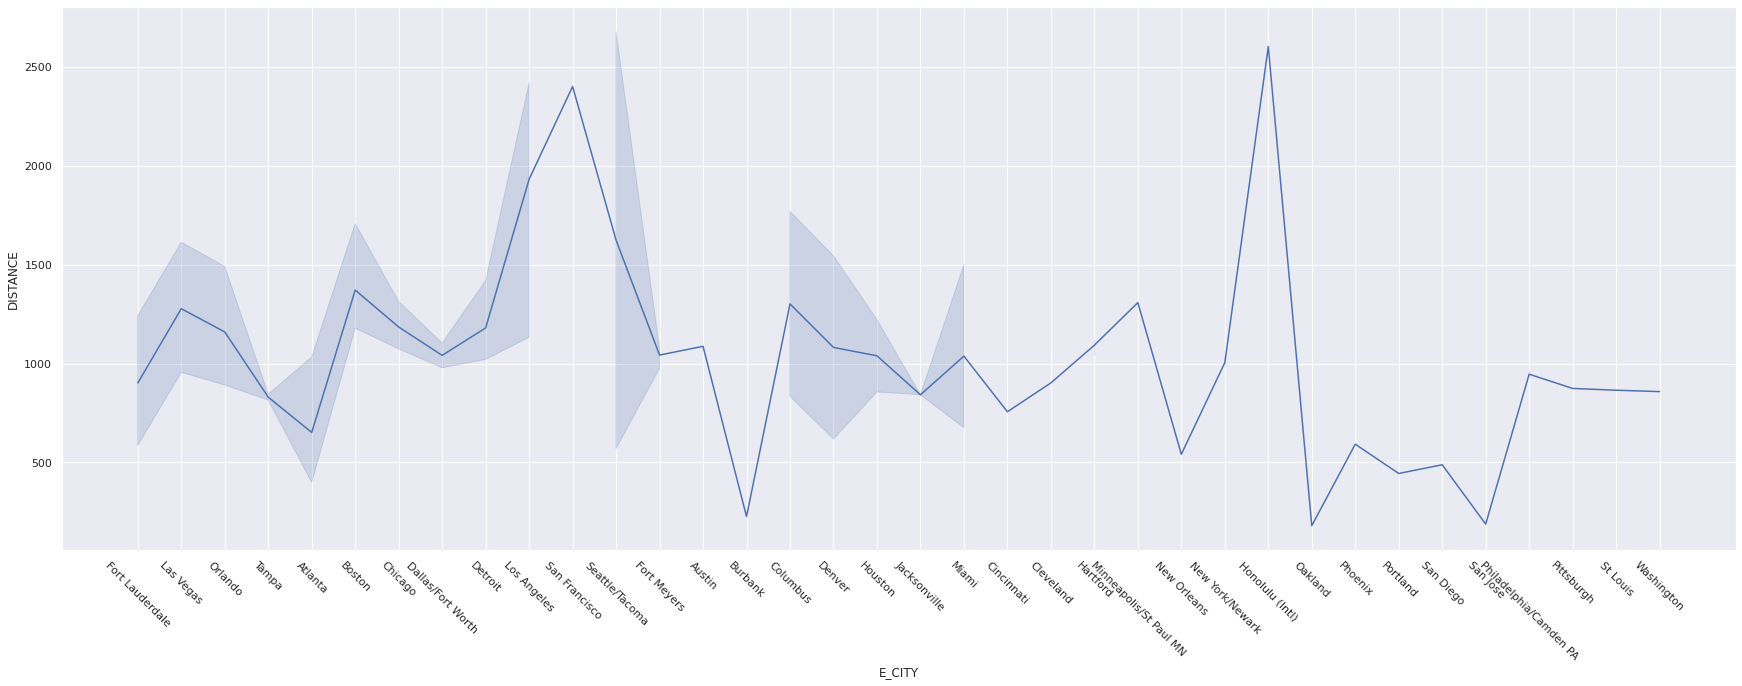

In [734]:
sns.set(rc={'figure.figsize':(30,10)})
sns.set_theme(style='darkgrid')
sns.lineplot(x='E_CITY',y='DISTANCE',data=VacationAirfares,markers=True)
plt.xticks(rotation=-45);

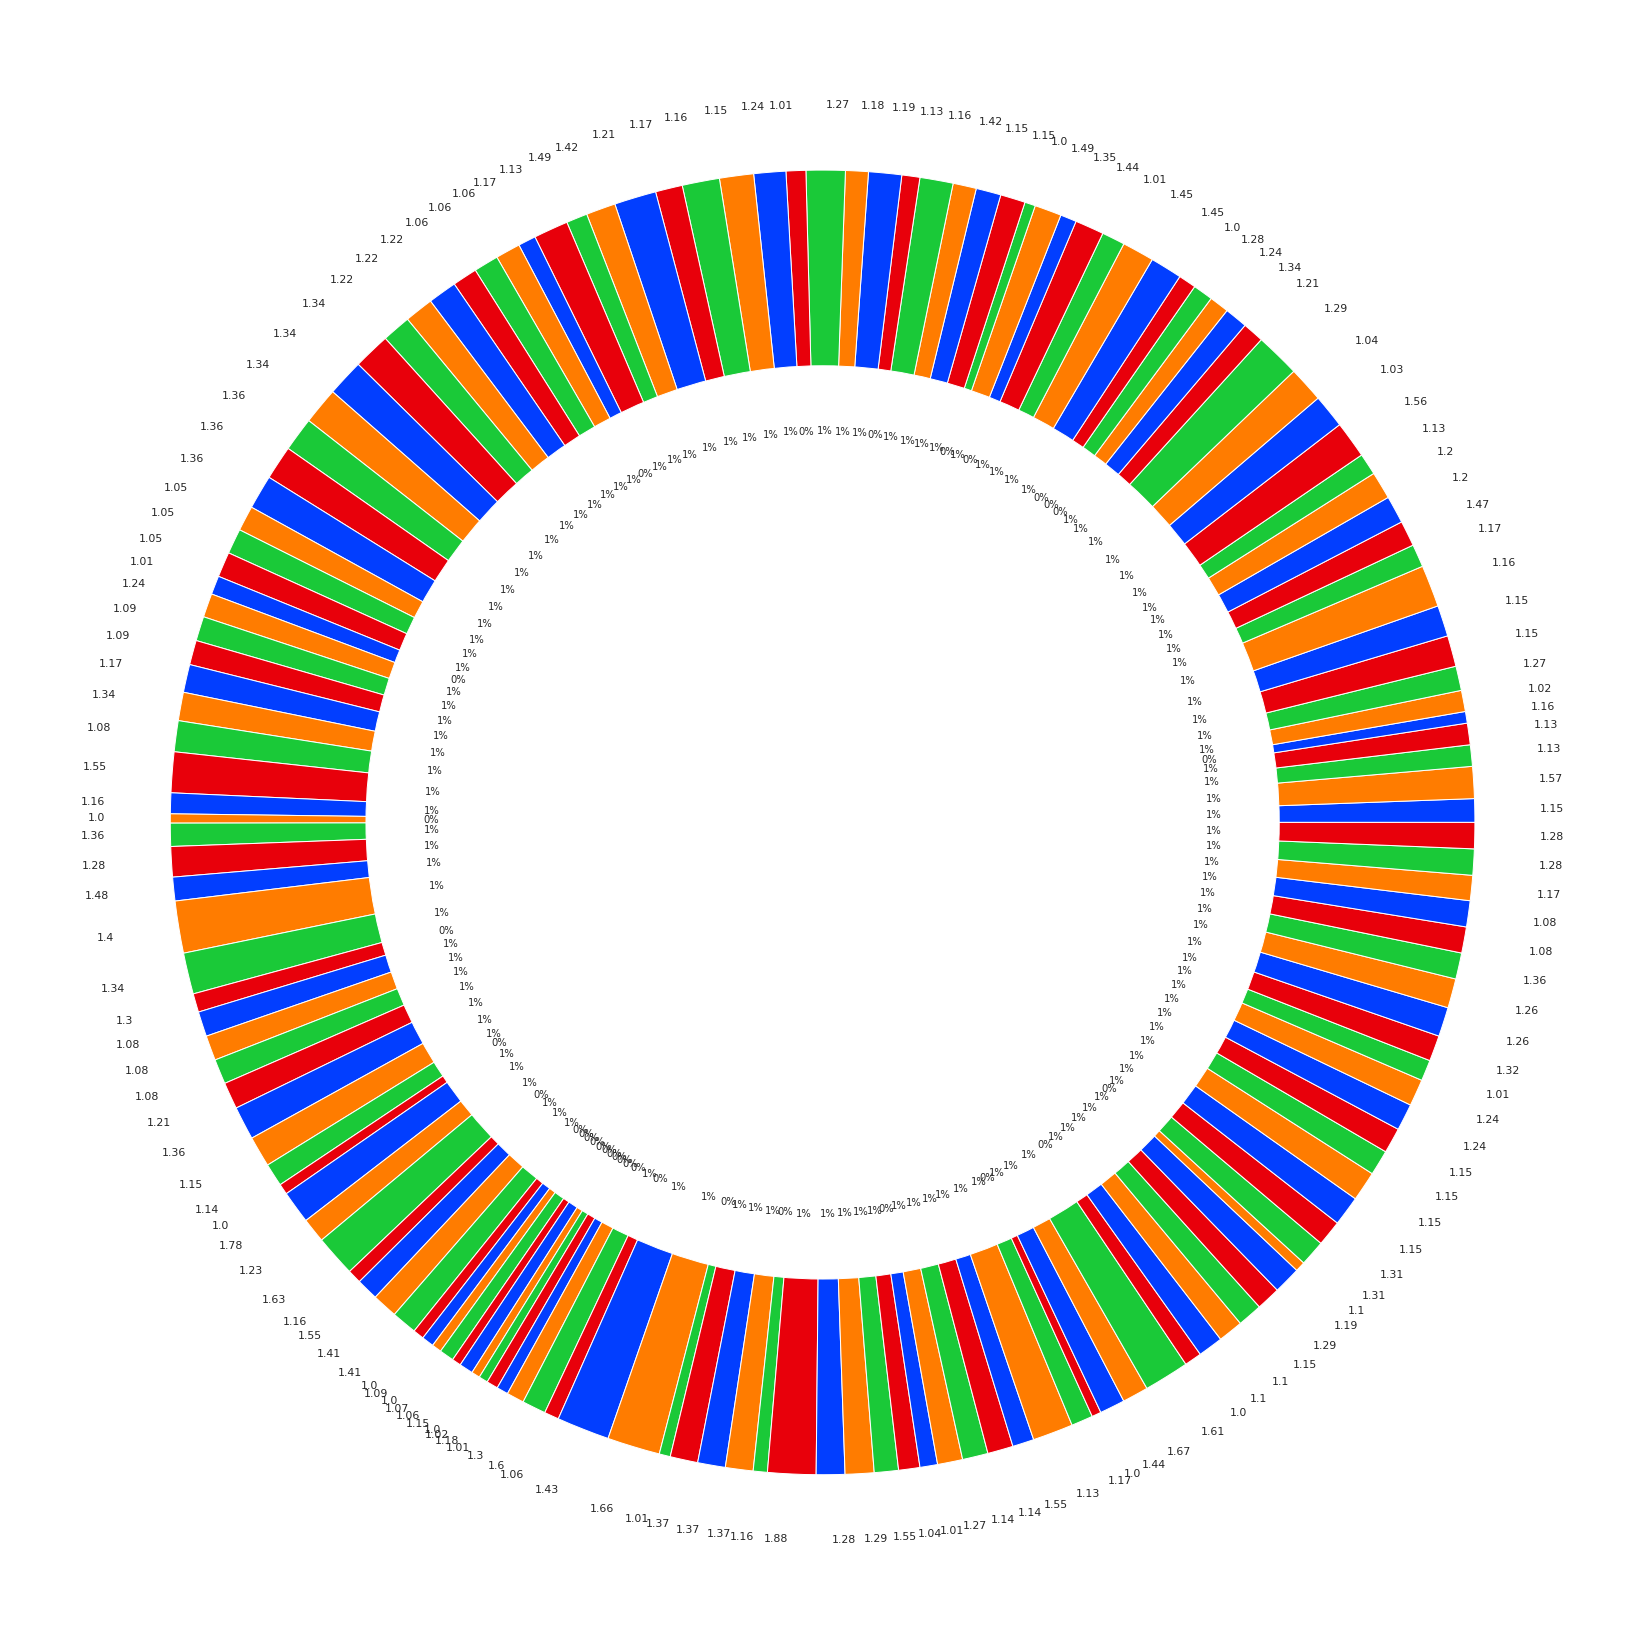

In [735]:
plt.figure(figsize=(30,30))
plt.rcParams['font.size'] = '10'

fracs = np.array(VacationAirfares['FARE'])
total = sum(fracs)

colors = sns.color_palette('bright')[0:4]

plt.pie(x=VacationAirfares['FARE'],
        labels=VacationAirfares['COUPON'], 
        colors  = colors,
        autopct='%.0f%%')

# add a circle at the center to transform it in a donut chart
circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)

plt.show()

Insights: Vacation analysis with the coupon (no stop flights are prefered in off seasons where as flights with multiple stops are considered in vacation period)

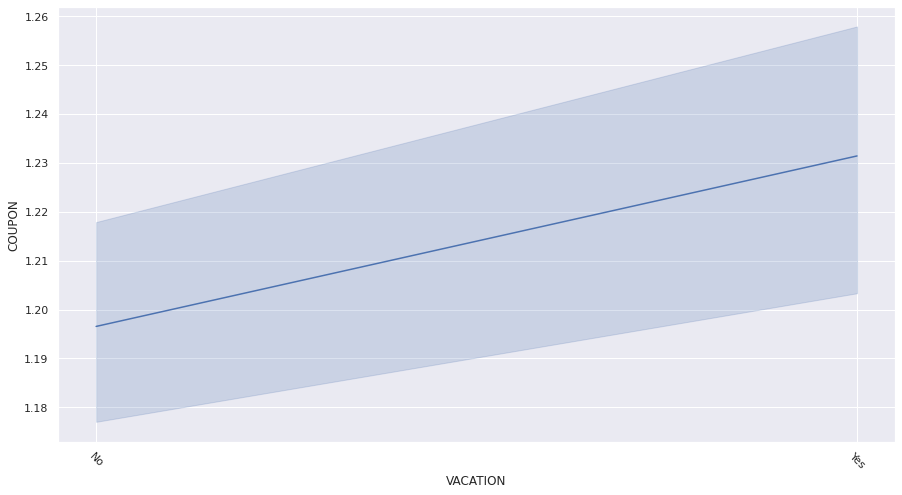

In [736]:
sns.set(rc={'figure.figsize':(15,8)})
sns.set_theme(style='darkgrid')
sns.lineplot(x='VACATION',y='COUPON',data=Airfares,markers=True)
plt.xticks(rotation=-45);

Southwest Airline analysis between distance of starting and ending points. Also the average fare between the routes. 

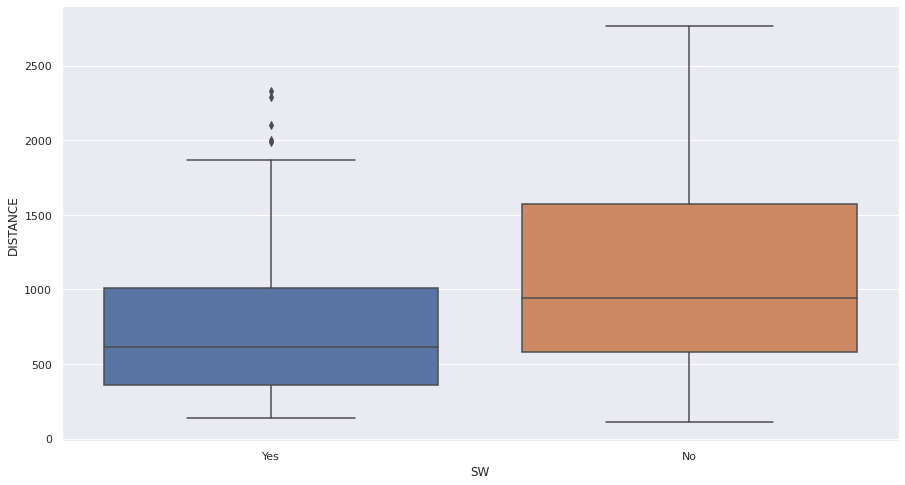

In [737]:
sns.boxplot(x='SW',y='DISTANCE', data=Airfares);

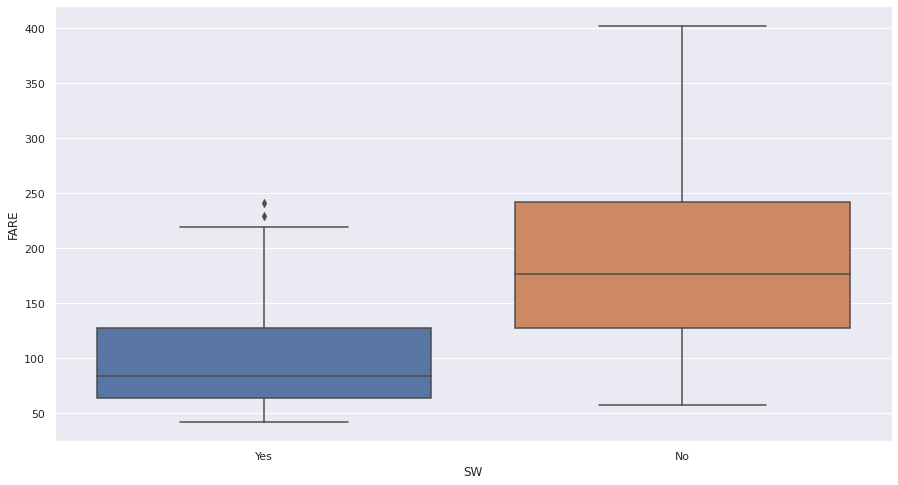

In [738]:
sns.boxplot(x='SW',y='FARE', data=Airfares);

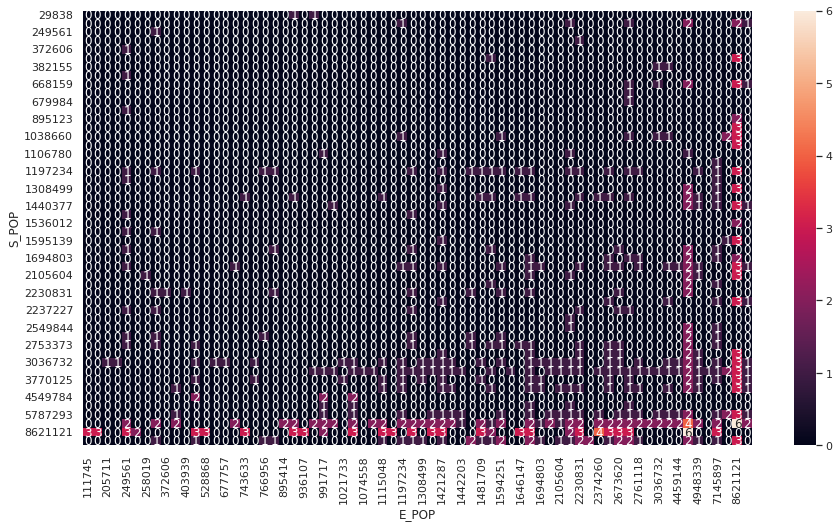

In [739]:
sns.heatmap(pd.crosstab(Airfares.S_POP, Airfares.E_POP),annot=True,fmt=".0f");